# Ejercicio 1: Predicción de streams de canciones de Spotify
---

## Comprobación de los datos del dataset spotify-2023.csv:
___

In [4]:
import pandas as pd

musica = pd.read_csv('spotify-2023.csv', encoding='latin1')
print(musica.head())
print(musica.describe())


                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               


___
## Depuración de datos:
---



In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Leer el dataset spotify-2023.csv con codificación latin1
musica = pd.read_csv('spotify-2023.csv', encoding='latin1')

print("Primeras filas del dataset:")
print(musica.head())

# Imprimir los nombres de las columnas
print("\nNombres de las columnas del dataset:")
print(musica.columns)

# Limpiar los nombres de las columnas
musica.columns = musica.columns.str.strip()

# Eliminar duplicados
musica = musica.drop_duplicates()
print("\nDataset después de eliminar duplicados:")
print(musica.head())

# Eliminar filas con datos faltantes
musica = musica.dropna()
print("\nDataset después de eliminar filas con datos faltantes:")
print(musica.head())

# Normalizar datos numéricos (ejemplo: escalar entre 0 y 1)
scaler = MinMaxScaler()
numerical_columns = musica.select_dtypes(include=['float64', 'int64']).columns
musica[numerical_columns] = scaler.fit_transform(musica[numerical_columns])
print("\nDataset después de normalizar datos numéricos:")
print(musica.head())

print("\nNombres de las columnas del dataset después de normalizar datos numéricos:")
print(musica.columns)

# Excluir la columna 'streams' antes de transformar variables categóricas
streams = musica['streams']
musica = musica.drop(columns=['streams'])

# Transformar variables categóricas a variables dummy (one-hot encoding)
musica = pd.get_dummies(musica, drop_first=True)

# Volver a agregar la columna 'streams'
musica['streams'] = streams

# Asegurarse de que la columna 'streams' sea numérica
musica['streams'] = pd.to_numeric(musica['streams'], errors='coerce')

# Eliminar filas con valores NaN en 'streams'
musica = musica.dropna(subset=['streams'])

print("\nDataset después de transformar variables categóricas:")
print(musica.head())


Primeras filas del dataset:
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                1

---

## Analisis de variables influyentes

___

In [6]:
# Analizar las variables más influyentes en los streams
numerical_columns = musica.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = musica[numerical_columns].corr()
print("\nMatriz de correlación:")
print(correlation_matrix)

# Mostrar las variables más influyentes en los streams
print("\nVariables más influyentes en los streams:")
print(correlation_matrix['streams'].sort_values(ascending=False))


Matriz de correlación:
                      artist_count  released_year  released_month  \
artist_count              1.000000       0.070900        0.032788   
released_year             0.070900       1.000000        0.069671   
released_month            0.032788       0.069671        1.000000   
released_day             -0.015870       0.161053        0.055562   
in_spotify_playlists     -0.085454      -0.397052       -0.123000   
in_spotify_charts        -0.009075       0.066054       -0.051346   
in_apple_playlists       -0.017501      -0.207317       -0.035094   
in_apple_charts          -0.076131      -0.002027       -0.019569   
in_deezer_charts          0.020231       0.094426        0.006168   
bpm                      -0.059221      -0.014195       -0.050236   
danceability_%            0.213480       0.212401       -0.056599   
valence_%                 0.124561      -0.042665       -0.108818   
energy_%                  0.137801       0.081478       -0.086510   
acousticne

---

## Entrenamiento del modelo de regresión lineal

---

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separar características y variable objetivo
x = musica.drop(columns=['streams'])
y = musica['streams']

# Eliminar filas con valores NaN en las características
x = x.dropna()
y = y[x.index]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

---

## Evaluación del modelo

---

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predecir los streams en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo con métricas como RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE del modelo de regresión lineal:")
print(rmse)


RMSE del modelo de regresión lineal:
271778817.7563504


---

## Presentación de resultados

---

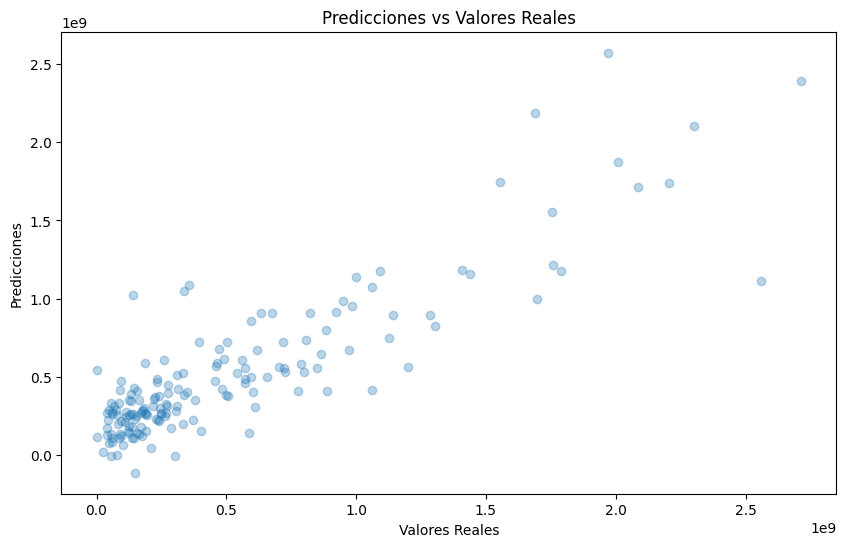

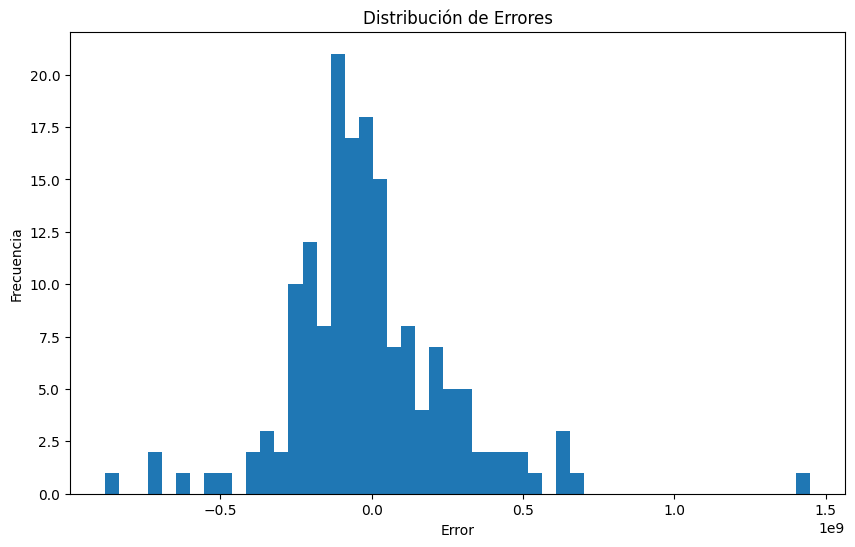

In [9]:
import matplotlib.pyplot as plt

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Histograma de errores
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.show()